## 加载数据

In [1]:
import pandas as pd

# 1. 数据加载
data = pd.read_csv('materials_data.csv')
data

,Atomic_Radius,Electronegativity,Conductivity
0,-0.419967,6.190019,0
1,8.834131,0.589199,1
2,1.899191,-1.626958,1
3,5.946968,0.538920,1
4,4.188679,9.955939,1
...,...,...,...
995,-0.927243,14.691018,0
996,6.452618,3.263615,1
997,1.210126,-2.060734,1
998,7.455004,1.844685,1


## 可视化原始数据

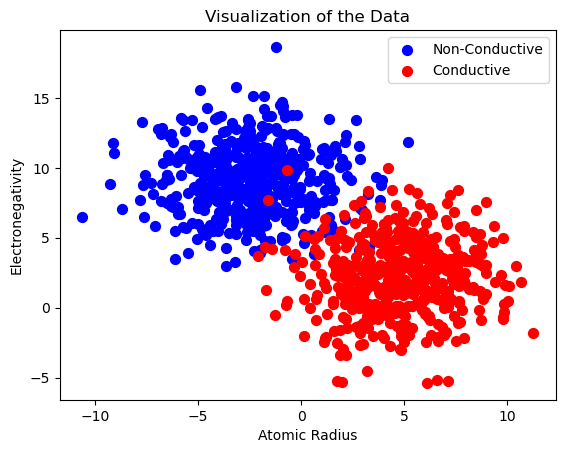

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 从CSV文件读取数据
data = pd.read_csv('materials_data.csv')
X = data[['Atomic_Radius', 'Electronegativity']].values
y = data['Conductivity'].values

# 可视化数据点
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', s=50, label='Non-Conductive')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', s=50, label='Conductive')
plt.xlabel('Atomic Radius')
plt.ylabel('Electronegativity')
plt.legend()
plt.title('Visualization of the Data')
plt.show()

## 机器学习

Results for k=1:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       168
           1       0.99      0.96      0.97       162

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330

Accuracy: 0.9757575757575757
------------------------------------------------------


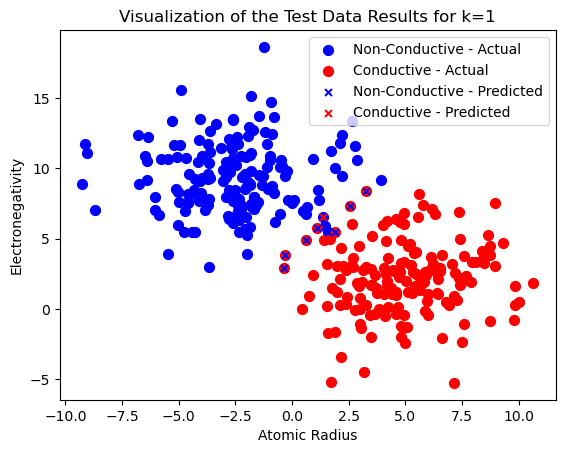

Results for k=3:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       168
           1       0.99      0.97      0.98       162

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330

Accuracy: 0.9818181818181818
------------------------------------------------------


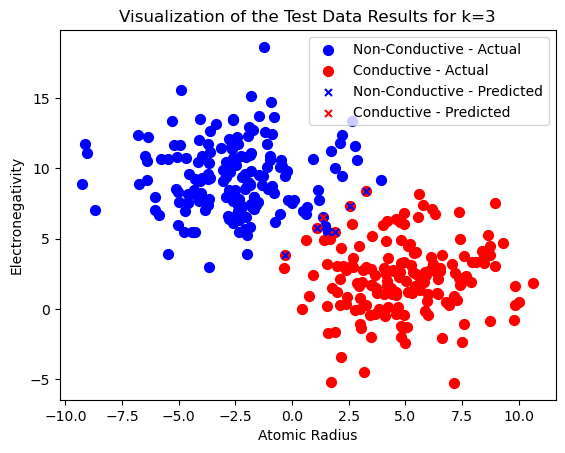

Results for k=5:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       168
           1       1.00      0.98      0.99       162

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330

Accuracy: 0.990909090909091
------------------------------------------------------


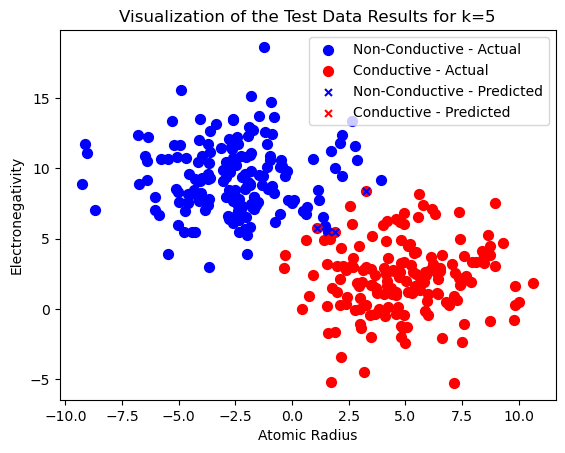

Results for k=7:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       168
           1       1.00      0.98      0.99       162

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330

Accuracy: 0.9878787878787879
------------------------------------------------------


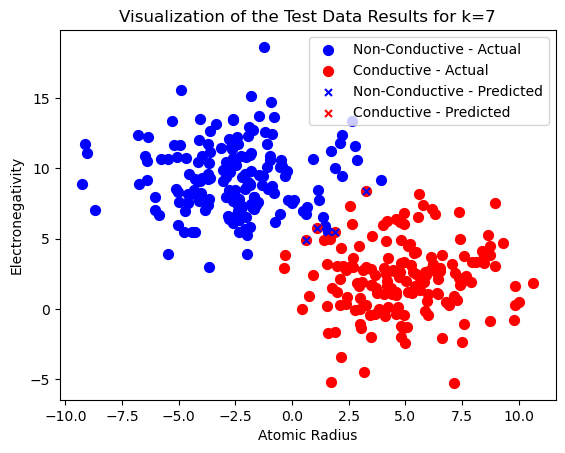

Results for k=9:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       168
           1       1.00      0.98      0.99       162

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330

Accuracy: 0.990909090909091
------------------------------------------------------


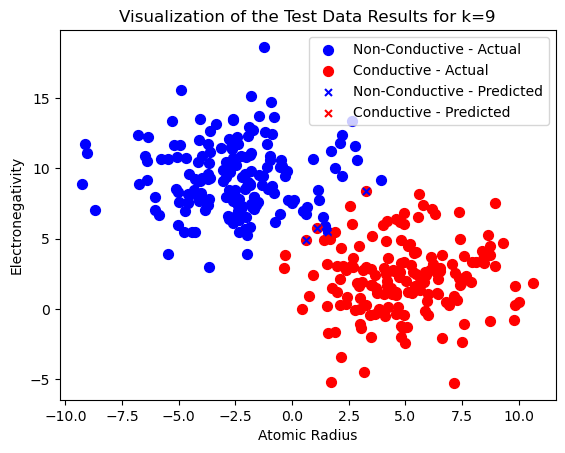

Results for k=11:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       168
           1       0.99      0.98      0.98       162

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330

Accuracy: 0.9848484848484849
------------------------------------------------------


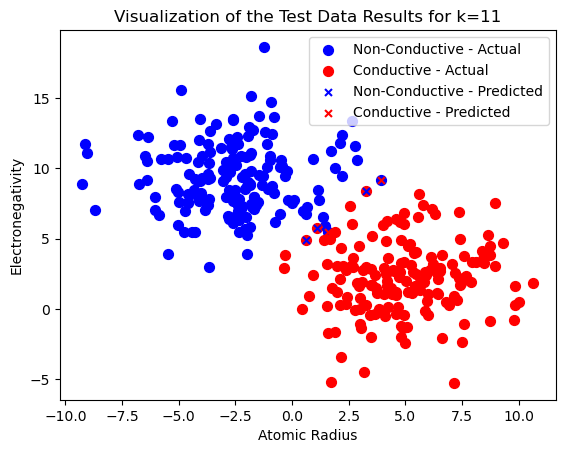

Results for k=13:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       168
           1       0.99      0.98      0.98       162

    accuracy                           0.98       330
   macro avg       0.99      0.98      0.98       330
weighted avg       0.99      0.98      0.98       330

Accuracy: 0.9848484848484849
------------------------------------------------------


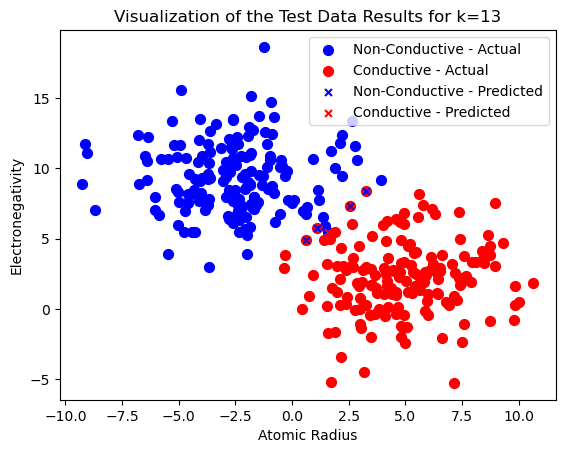

Results for k=15:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       168
           1       0.99      0.98      0.98       162

    accuracy                           0.98       330
   macro avg       0.99      0.98      0.98       330
weighted avg       0.99      0.98      0.98       330

Accuracy: 0.9848484848484849
------------------------------------------------------


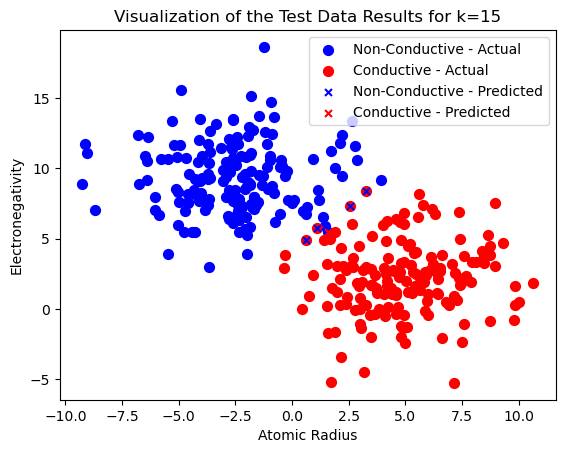

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

k_values = [1, 3, 5, 7, 9, 11, 13, 15]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan') #指定距离
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"Results for k={k}:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("------------------------------------------------------")

    # 可视化测试集的结果
    plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='blue', s=50, label='Non-Conductive - Actual')
    plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='red', s=50, label='Conductive - Actual')

    # 使用不同的标记可视化预测结果
    plt.scatter(X_test[y_pred == 0][:, 0], X_test[y_pred == 0][:, 1], color='blue', s=25, marker='x', label='Non-Conductive - Predicted')
    plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], color='red', s=25, marker='x', label='Conductive - Predicted')

    plt.xlabel('Atomic Radius')
    plt.ylabel('Electronegativity')
    plt.legend()
    plt.title(f'Visualization of the Test Data Results for k={k}')
    plt.show()